In [89]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [90]:
import numpy as np
import time
import pickle
from pprint import pprint
from tqdm import tqdm
import matplotlib.pyplot as plt
from glob import glob

from package.helpers import test_physical_lens
from package.pandeia import pandeia_input
from package.pandeia.pandeia_output import PandeiaOutput
from package.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [91]:
csv = os.path.join(repo_path, 'data', 'roman_spacecraft_and_instrument_parameters.csv')
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'skypy_test')

In [92]:
image_filepaths = glob(array_dir + '/skypy_output_0*.npy')
image_list = []
for filepath in image_filepaths:
    image_list.append(np.load(filepath))

execution_times = np.load(os.path.join(array_dir, 'skypy_output_execution_times.npy'))

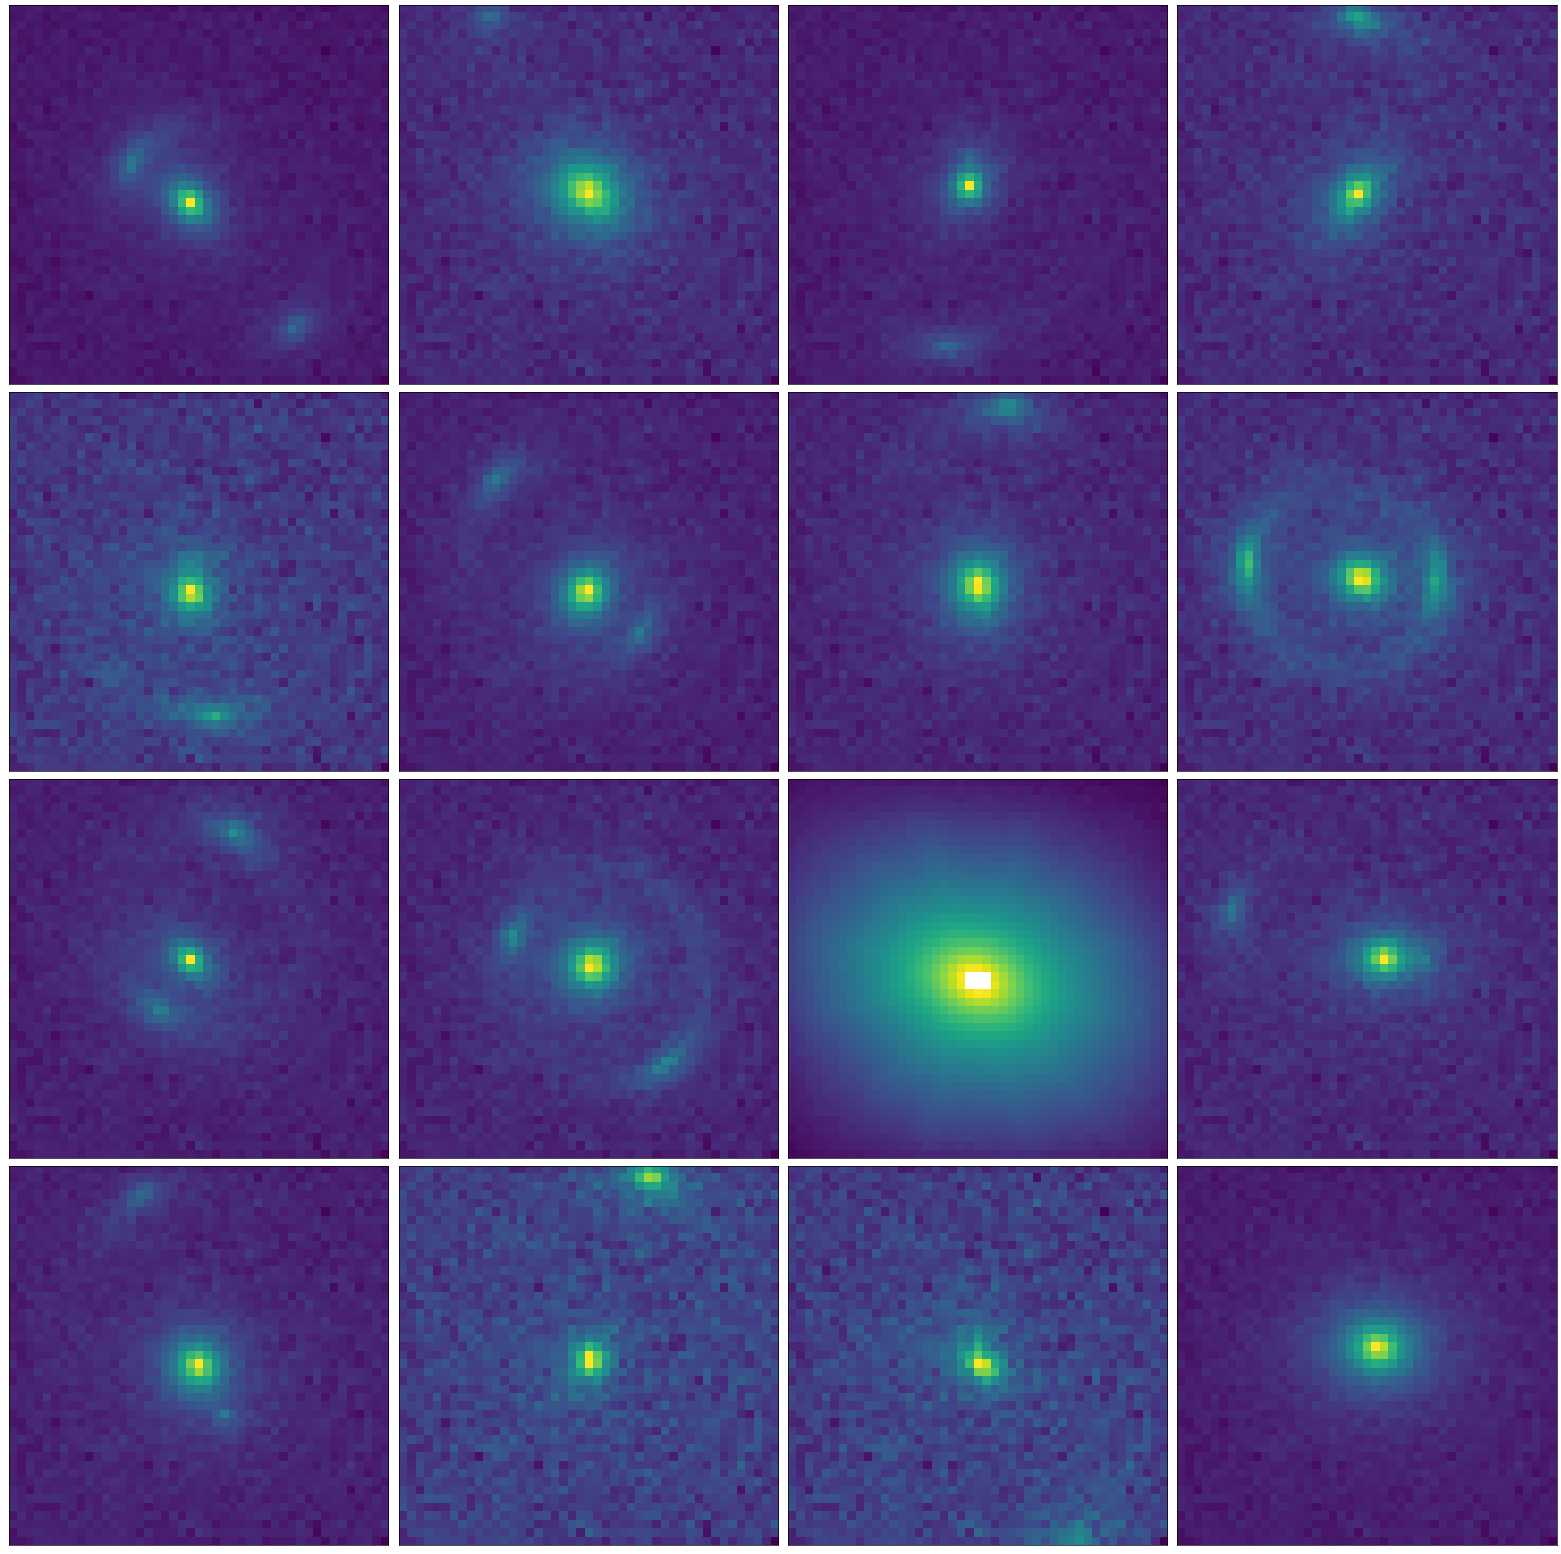

In [93]:
side = 4
f, ax = plt.subplots(nrows=side, ncols=side, figsize=(20, 20), gridspec_kw={'hspace': 0.02,'wspace':0.02})

for i, image in enumerate(image_list):
    ax[i//side,i%side].imshow(np.log10(image), cmap='viridis')
    ax[i//side,i%side].get_xaxis().set_visible(False)
    ax[i//side,i%side].get_yaxis().set_visible(False)
    
plt.savefig(os.path.join(figure_dir, 'skypy_output_test.png'))
plt.show()

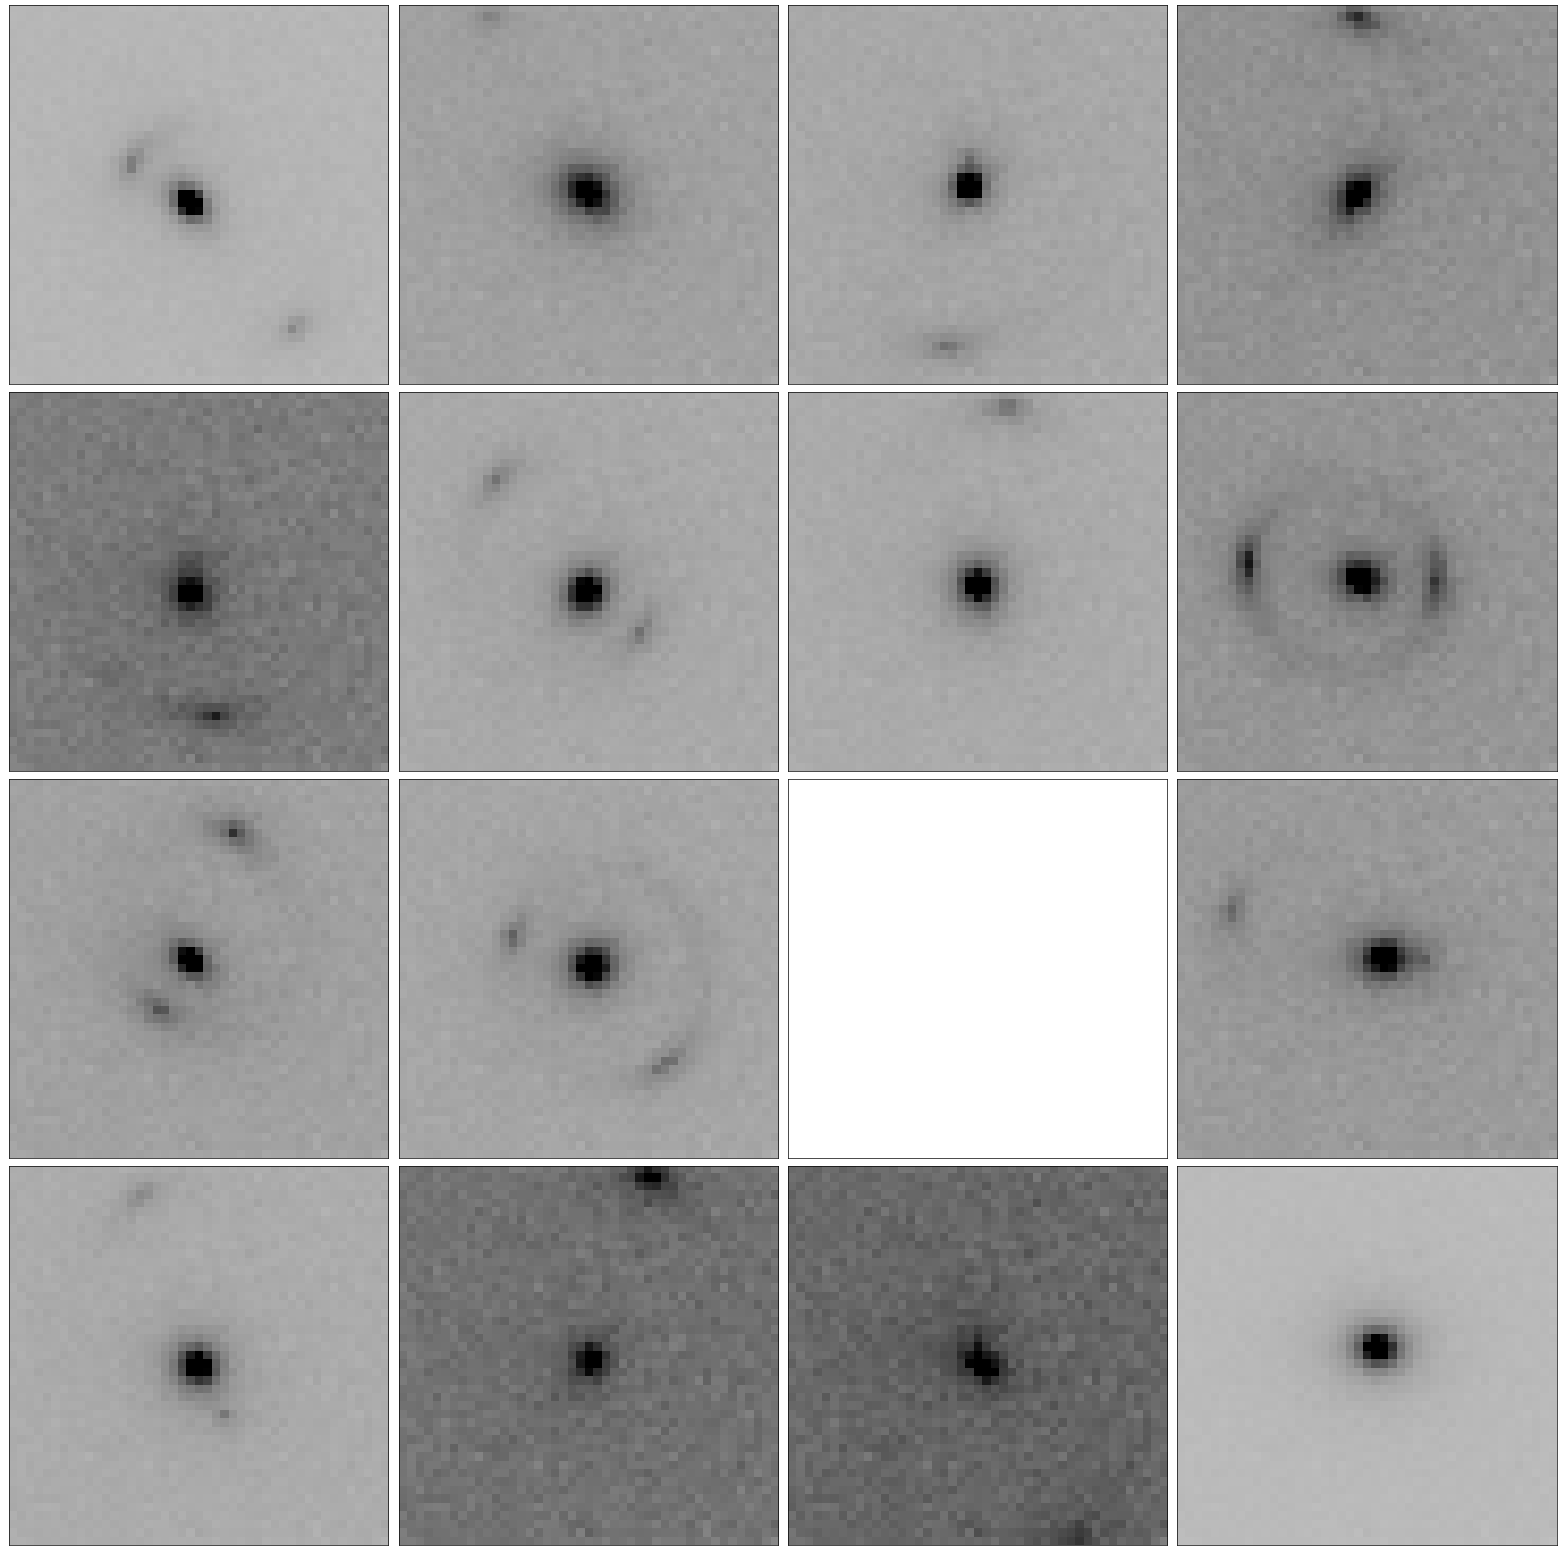

In [94]:
side = 4
f, ax = plt.subplots(nrows=side, ncols=side, figsize=(20, 20), gridspec_kw={'hspace': 0.02,'wspace':0.02})

import matplotlib

for i, image in enumerate(image_list):
    percentile = np.percentile(image, 99.75)
    vmin = -0.25 * percentile
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=percentile)
    ax[i//side,i%side].imshow(image, cmap='binary', norm=norm)
    ax[i//side,i%side].get_xaxis().set_visible(False)
    ax[i//side,i%side].get_yaxis().set_visible(False)
    
plt.savefig(os.path.join(figure_dir, 'skypy_output_test.png'))
plt.show()

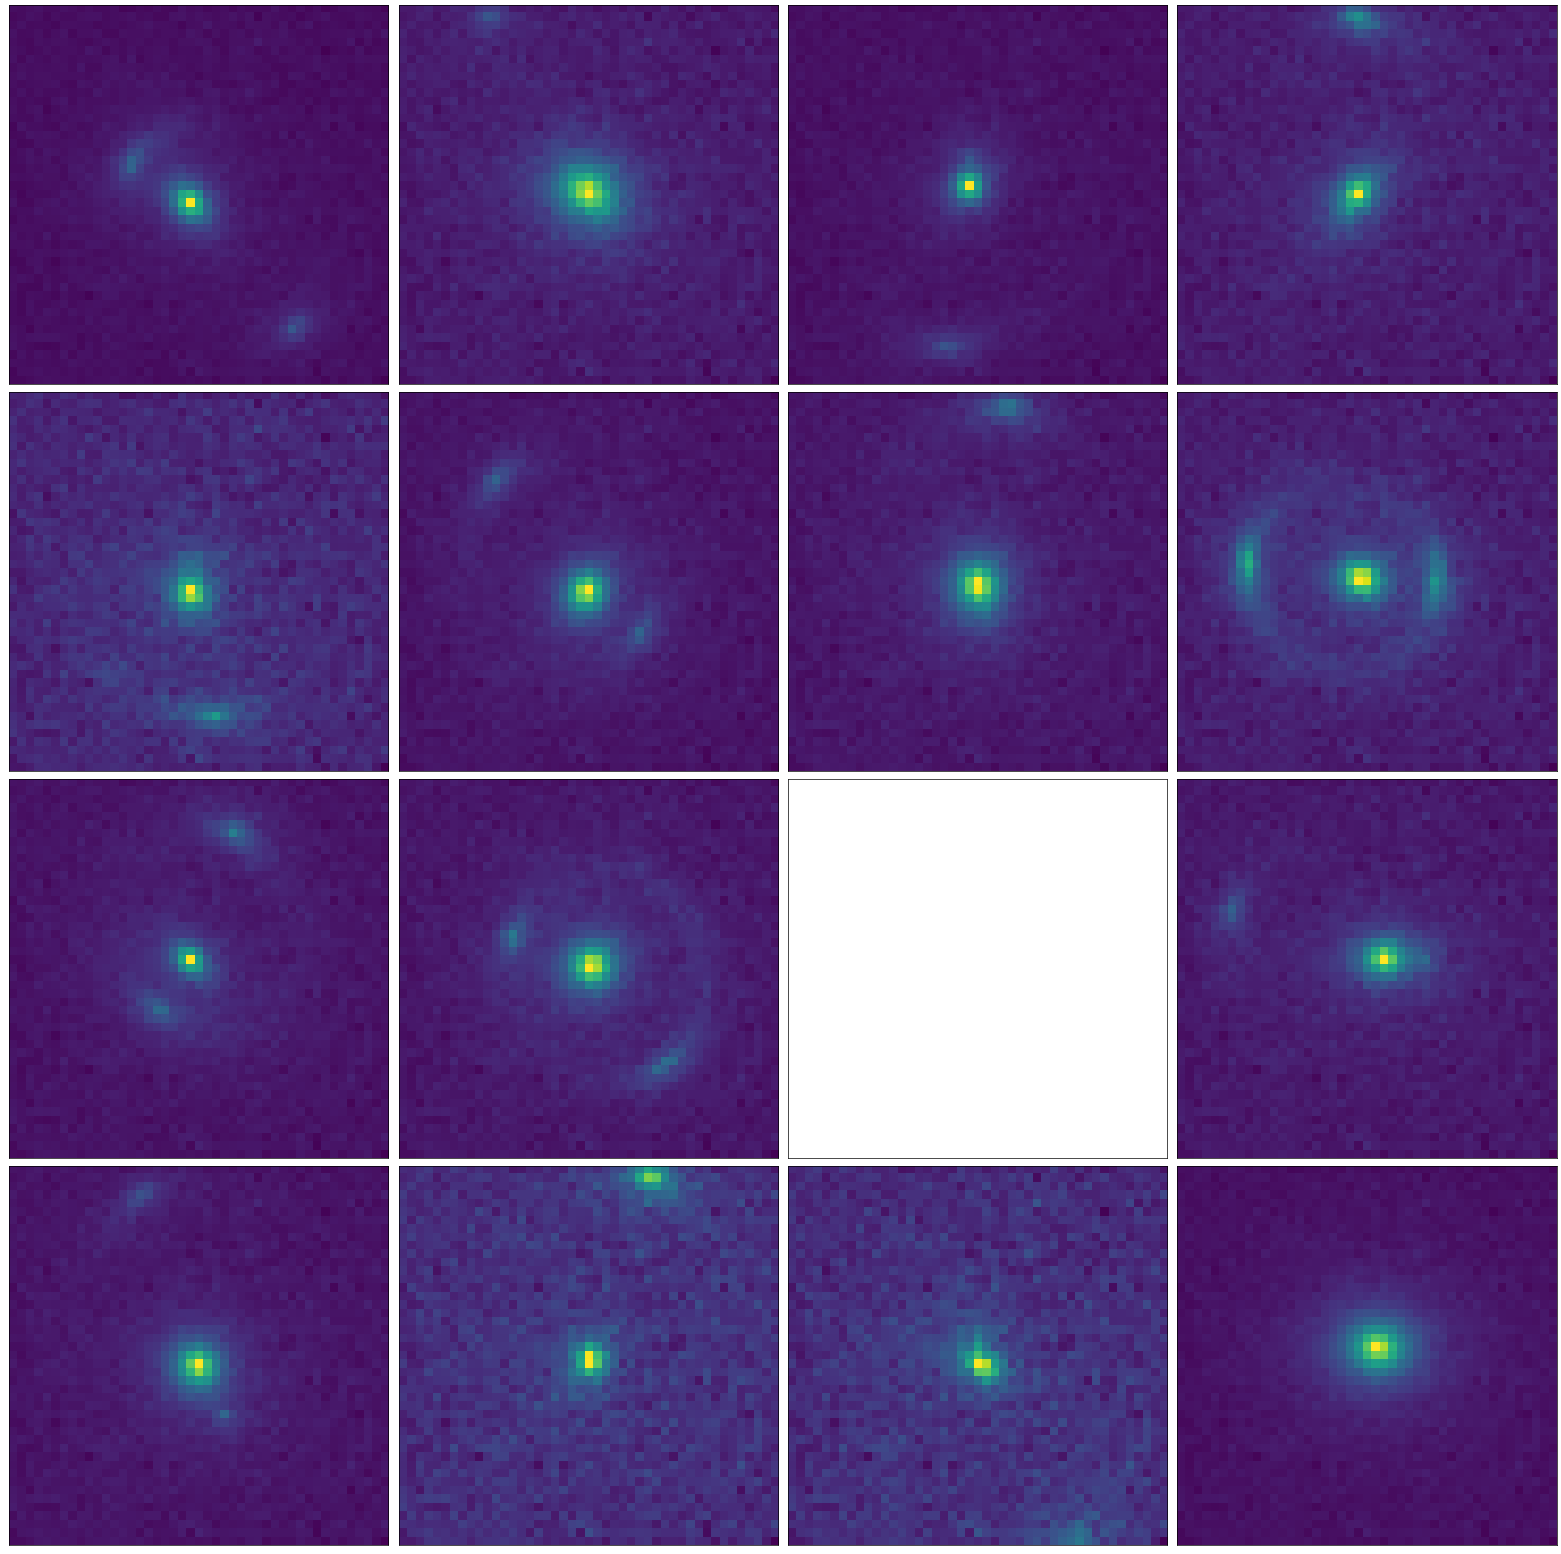

In [95]:
side = 4
f, ax = plt.subplots(nrows=side, ncols=side, figsize=(20, 20), gridspec_kw={'hspace': 0.02,'wspace':0.02})

for i, image in enumerate(image_list):
    image = np.arcsinh(image)
    image -= np.amin(image)
    image /= np.amax(image)
    ax[i//side,i%side].imshow(image, cmap='viridis')
    ax[i//side,i%side].get_xaxis().set_visible(False)
    ax[i//side,i%side].get_yaxis().set_visible(False)
    
plt.savefig(os.path.join(figure_dir, 'skypy_output_test.png'))
plt.show()

In [96]:
print(execution_times)

['0:20:52' '0:20:41' '0:21:05' '0:22:40' '0:21:00' '0:27:59' '0:27:47'
 '0:27:51' '0:28:11' '0:27:29' '0:27:27' '0:27:34' '0:42:11' '0:51:44'
 '0:51:48' '0:49:39']


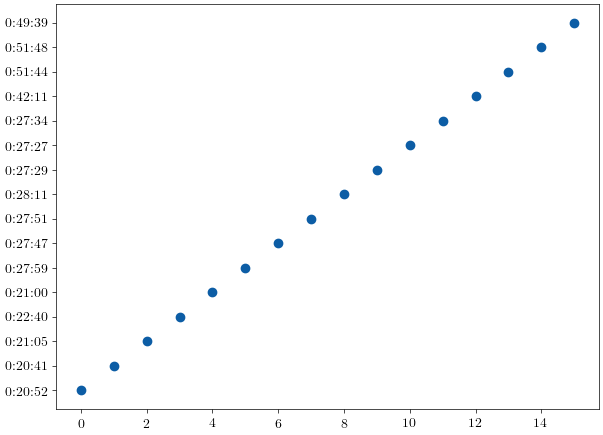

In [97]:
diagnostic_plot.execution_time_scatter(execution_times)